## Shanice Bailey
# CryoSat-2: Dynamic Topography of Southern Ocean

My Binder link: https://hub.mybinder.org/user/stb2145-rces-finalproject-mb7ozrhw/tree

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from glob import glob
import xarray as xr
import cartopy.crs as ccrs #cartopy coord ref sys
import cartopy
import cartopy.feature as cfeature

In [ ]:
! wget http://rkwok.jpl.nasa.gov/rgpsftp/cryosat2_topo/CS2_combined_Southern_Ocean_2011-2016.nc

In [2]:
cs2 = 'CS2_combined_Southern_Ocean_2011-2016.nc'
ds = xr.open_dataset(cs2)
ds = ds.set_coords(['Latitude', 'Longitude', 'Area'])
ds['date'] = pd.date_range('2011-01', periods=ds.date.size,freq='MS')
ds

<xarray.Dataset>
Dimensions:    (X: 205, Y: 215, date: 72)
Coordinates:
  * date       (date) datetime64[ns] 2011-01-01 2011-02-01 2011-03-01 ...
  * X          (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y          (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
    Latitude   (Y, X) float32 ...
    Longitude  (Y, X) float32 ...
    Area       (Y, X) float32 ...
Data variables:
    DOT        (date, Y, X) float32 ...
    SLA        (date, Y, X) float32 ...
    MDT        (Y, X) float32 ...
Attributes:
    Title:        CS2_combined_Southern_Ocean_2011-2016.nc
    Description:  Monthly merged dynamic ocean topography, sea level anomaly ...
    Projection::  Southern hemisphere SSM/I polar stereographic grid (https:/...
    Reference:    Armitage et al., Dynamic topography and sea level anomalies...

In [3]:
#checking projection type
ds.attrs['Projection:']

'Southern hemisphere SSM/I polar stereographic grid (https://nsidc.org/data/polar-stereo/ps_grids.html). Resolution: 50km. Bottom left corner: [-4500,-5000]; top right corner: [5750, 5750].'

In [4]:
ds.attrs

OrderedDict([('Title', 'CS2_combined_Southern_Ocean_2011-2016.nc'),
             ('Description',
              'Monthly merged dynamic ocean topography, sea level anomaly and mean sea surface records of the ice-covered and ice-free Southern Ocean between 2011-2016 from CryoSat-2 radar altimetry.'),
             ('Projection:',
              'Southern hemisphere SSM/I polar stereographic grid (https://nsidc.org/data/polar-stereo/ps_grids.html). Resolution: 50km. Bottom left corner: [-4500,-5000]; top right corner: [5750, 5750].'),
             ('Reference',
              'Armitage et al., Dynamic topography and sea level anomalies of the Southern Ocean: Variability and teleconnections, JGR-Oceans.')])

In [5]:
ds.MDT

<xarray.DataArray 'MDT' (Y: 215, X: 205)>
array([[     nan, 9.321053, 8.922684, ...,      nan,      nan,      nan],
       [9.393326, 9.128281, 8.790092, ...,      nan,      nan,      nan],
       [9.084267, 8.876312, 8.625931, ...,      nan,      nan,      nan],
       ...,
       [4.762772, 4.755409, 4.733826, ...,      nan,      nan,      nan],
       [4.951439, 4.958145, 4.977036, ...,      nan,      nan,      nan],
       [     nan, 5.082672, 5.118813, ...,      nan,      nan,      nan]],
      dtype=float32)
Coordinates:
  * X          (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y          (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
    Latitude   (Y, X) float32 ...
    Longitude  (Y, X) float32 ...
    Area       (Y, X) float32 ...
Attributes:
    units:       cm
    fill_value:  NaN

In [6]:
ccrs.Stereographic?

Init signature: ccrs.Stereographic(central_latitude=0.0, central_longitude=0.0, false_easting=0.0, false_northing=0.0, true_scale_latitude=None, scale_factor=None, globe=None)
Docstring:     
Define a projected coordinate system with flat topology and Euclidean
distance.
Init docstring:
Parameters
----------
proj4_params: iterable of key-value pairs
    The proj4 parameters required to define the
    desired CRS.  The parameters should not describe
    the desired elliptic model, instead create an
    appropriate Globe instance. The ``proj4_params``
    parameters will override any parameters that the
    Globe defines.
globe: :class:`~cartopy.crs.Globe` instance, optional
    If omitted, the default Globe instance will be created.
    See :class:`~cartopy.crs.Globe` for details.
File:           /opt/conda/lib/python3.6/site-packages/cartopy/crs.py
Type:           ABCMeta


In [7]:
#Changing X & Y from km to m
ds_scaled = ds.copy()
ds_scaled['X'] = ds['X'] * 1000
ds_scaled['Y'] = ds['Y'] * 1000
# how to change unit names from km to m

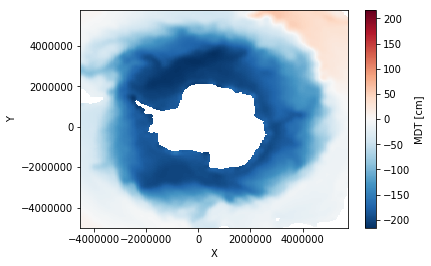

In [8]:
ds_scaled.MDT.plot()

In [9]:
#.values.item()?
# is this value from Latitude value itself or is it of Y?
#trying to find center point of each coord
center_point = {'X':len(ds.X)//2, 'Y':len(ds.Y)//2}
center_lat = ds.Latitude.isel(**center_point).values.item()
center_lat

-83.2791519165039

Text(0.5,1,'Using stereographic proj instead of SouthPolar')

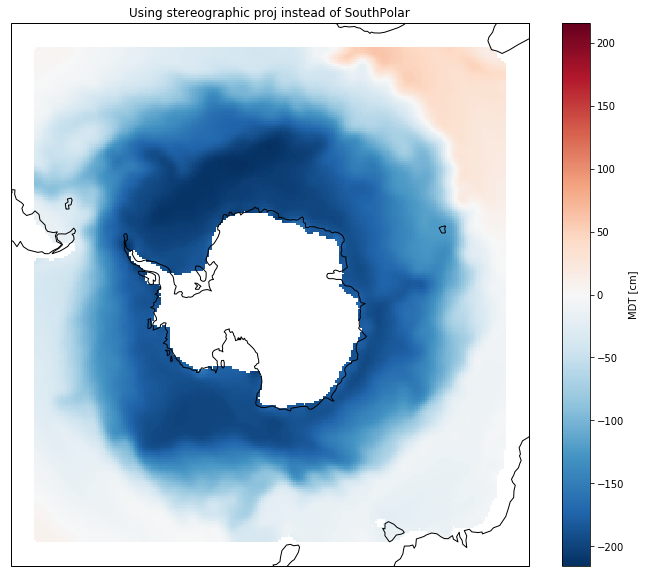

In [10]:
proj = ccrs.Stereographic(central_longitude=0, central_latitude=center_lat, false_northing=8e5)

plt.figure(figsize=(12, 10))
ax = plt.axes(projection=proj)
ax.coastlines()
ds_scaled.MDT.plot()
plt.title('Using stereographic proj instead of SouthPolar')
#ax.add_feature(cfeature.LAND, facecolor='0.9', edgecolor='k')

Text(0.5,1,'Using Pcolormesh')

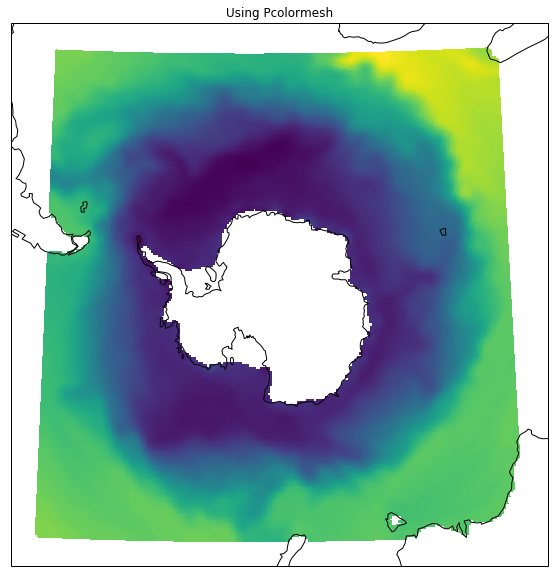

In [11]:
plt.figure(figsize=(12,10))

ax = plt.axes(projection=proj)
ax.coastlines()
ax.pcolormesh(ds_scaled.Longitude, ds_scaled.Latitude, ds_scaled.MDT, transform=ccrs.PlateCarree())
plt.title('Using Pcolormesh')

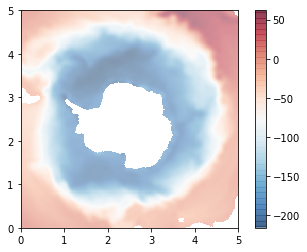

In [12]:
contours = plt.contour(ds.Longitude, ds.Latitude, ds.MDT, levels=20, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(ds.MDT, extent=[0, 5, 0, 5], origin='lower',
          cmap='RdBu_r', alpha=0.5)
plt.colorbar();

## Figure 4a)

In [13]:
#ds.Longitude.plot()

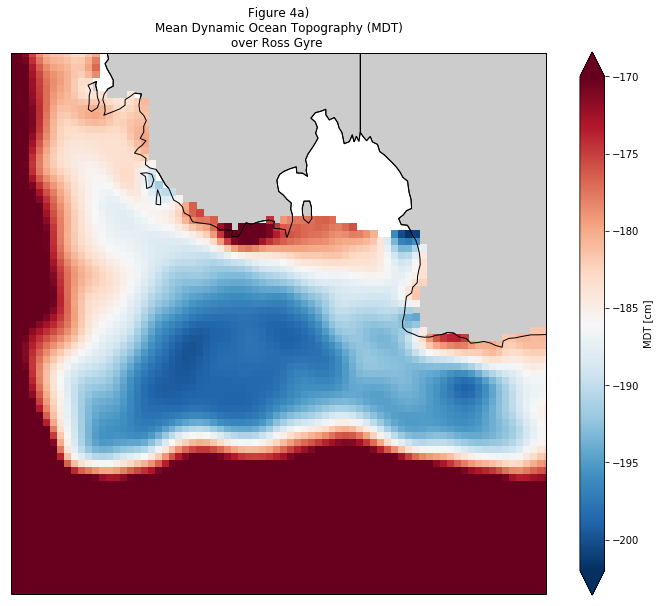

In [14]:
extent = [-200,-140,-55,-90]
plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='0.8', edgecolor='k')
ax.set_extent(extent, crs=ccrs.PlateCarree())
ds.MDT.plot(x='Longitude', y='Latitude', transform=ccrs.PlateCarree(),cmap='RdBu_r', vmin=-202, vmax=-170)
plt.title('Figure 4a)\nMean Dynamic Ocean Topography (MDT)\nover Ross Gyre ');

>**Figure 4a).** Seasonal variability of the Ross Gyre: the mean dynamic ocean topography (cm) over the period of 2011-2016, the color scale is purposefully saturated to highlight the Ross Gyre. There is a dip in the cyclonic gyre.

In [15]:
ds_wi211 = ds.where(ds.DOT<=-211)
ds_wi211

<xarray.Dataset>
Dimensions:    (X: 205, Y: 215, date: 72)
Coordinates:
  * date       (date) datetime64[ns] 2011-01-01 2011-02-01 2011-03-01 ...
  * X          (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y          (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
    Latitude   (Y, X) float32 -33.2011 -33.441322 -33.68056 -33.918777 ...
    Longitude  (Y, X) float32 -138.02869 -138.34859 -138.67169 -138.99803 ...
    Area       (Y, X) float32 1593.5522 1600.7418 1607.8981 1615.0198 ...
Data variables:
    DOT        (date, Y, X) float32 nan nan nan nan nan nan nan nan nan nan ...
    SLA        (date, Y, X) float32 nan nan nan nan nan nan nan nan nan nan ...
    MDT        (Y, X, date) float32 nan nan nan nan nan nan nan nan nan nan ...
Attributes:
    Title:        CS2_combined_Southern_Ocean_2011-2016.nc
    Description:  Monthly merged dynamic ocean topography, sea level anomaly ...
    Projection::  Southern hemisphere SSM/I polar stereograph

## Figure 5a)

Text(0.5,1,'Figure 5a\nMean Dynamic Ocean Topography (MDT)\nover Weddell Gyre)')

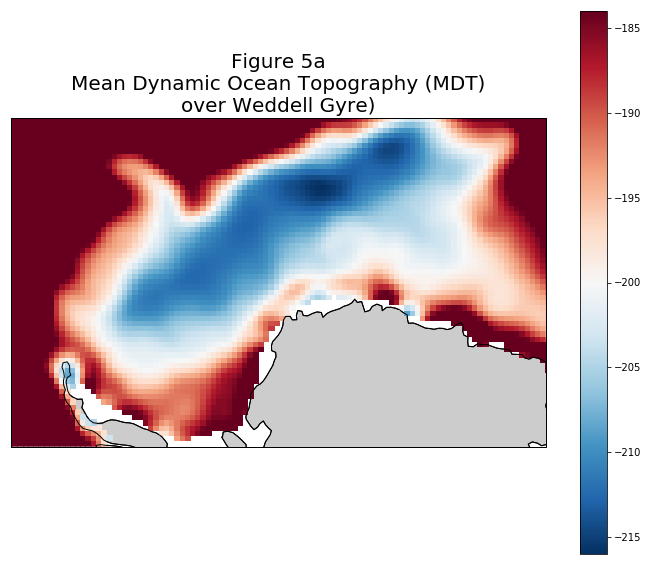

In [16]:
#missing contour lines and 1km isobath line
#How to add thick, black line of 1km isobath?
#How to fix colorbar size
extent = [-50,33,-55,-79]
plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='0.8', edgecolor='k')
ax.set_extent(extent, crs=ccrs.PlateCarree())

mdt_cs = ax.pcolormesh(ds.Longitude, ds.Latitude, ds.MDT, transform=ccrs.PlateCarree(), cmap='RdBu_r', 
                                                                                        vmin=-216, vmax=-184)
ax.contour(ds.Longitude, ds.Latitude, ds.MDT, levels=20, colors='k')
plt.colorbar(mdt_cs)
plt.title('Figure 5a\nMean Dynamic Ocean Topography (MDT)\nover Weddell Gyre)', fontsize=20)

>**Figure 5a).** Seasonal variability of the Weddell Gyre: the mean dynamic ocean topography (cm) over the period of 2011-2016, the color scale is purposefully saturated to highlight the Weddell Gyre. There is a dip in the cyclonic gyre.

In [17]:
#ds.variables

In [18]:
ds.MDT

<xarray.DataArray 'MDT' (Y: 215, X: 205)>
array([[     nan, 9.321053, 8.922684, ...,      nan,      nan,      nan],
       [9.393326, 9.128281, 8.790092, ...,      nan,      nan,      nan],
       [9.084267, 8.876312, 8.625931, ...,      nan,      nan,      nan],
       ...,
       [4.762772, 4.755409, 4.733826, ...,      nan,      nan,      nan],
       [4.951439, 4.958145, 4.977036, ...,      nan,      nan,      nan],
       [     nan, 5.082672, 5.118813, ...,      nan,      nan,      nan]],
      dtype=float32)
Coordinates:
  * X          (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y          (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
    Latitude   (Y, X) float32 -33.2011 -33.441322 -33.68056 -33.918777 ...
    Longitude  (Y, X) float32 -138.02869 -138.34859 -138.67169 -138.99803 ...
    Area       (Y, X) float32 ...
Attributes:
    units:       cm
    fill_value:  NaN

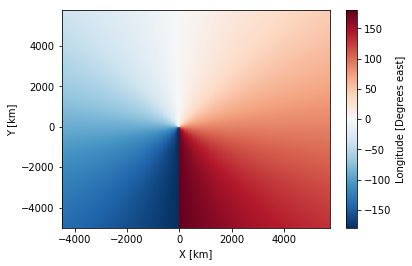

In [19]:
ds.Longitude.plot()

#Lon, Lat are 2D variables, don't really worry about them being variables in this case
ds.assign_coords(ds.Longitude)

ds.Longitude.sel([-78,20], method='nearest')

In [20]:
ds.attrs

OrderedDict([('Title', 'CS2_combined_Southern_Ocean_2011-2016.nc'),
             ('Description',
              'Monthly merged dynamic ocean topography, sea level anomaly and mean sea surface records of the ice-covered and ice-free Southern Ocean between 2011-2016 from CryoSat-2 radar altimetry.'),
             ('Projection:',
              'Southern hemisphere SSM/I polar stereographic grid (https://nsidc.org/data/polar-stereo/ps_grids.html). Resolution: 50km. Bottom left corner: [-4500,-5000]; top right corner: [5750, 5750].'),
             ('Reference',
              'Armitage et al., Dynamic topography and sea level anomalies of the Southern Ocean: Variability and teleconnections, JGR-Oceans.')])

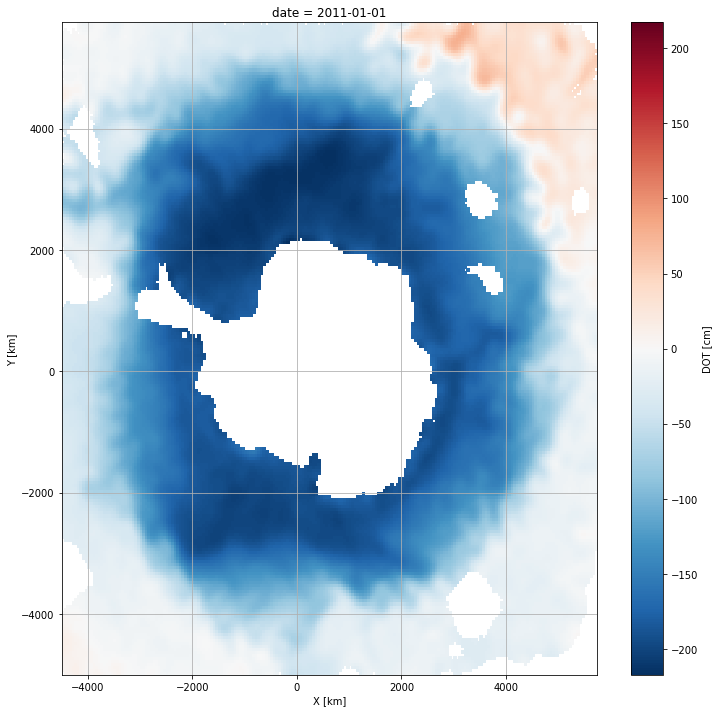

In [21]:
ds.DOT[0].plot(figsize=(12,12))
plt.grid()

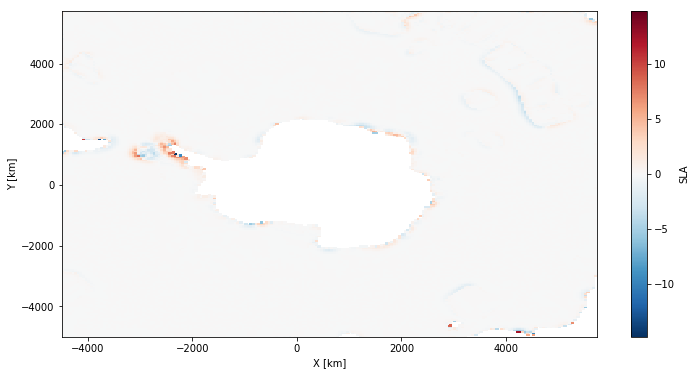

In [22]:
ds.SLA.mean(dim='date').plot(figsize=(12,6))

## Figure 6b)

### Calculating Gyre Depth
= mSLA_211 - mSLA_205

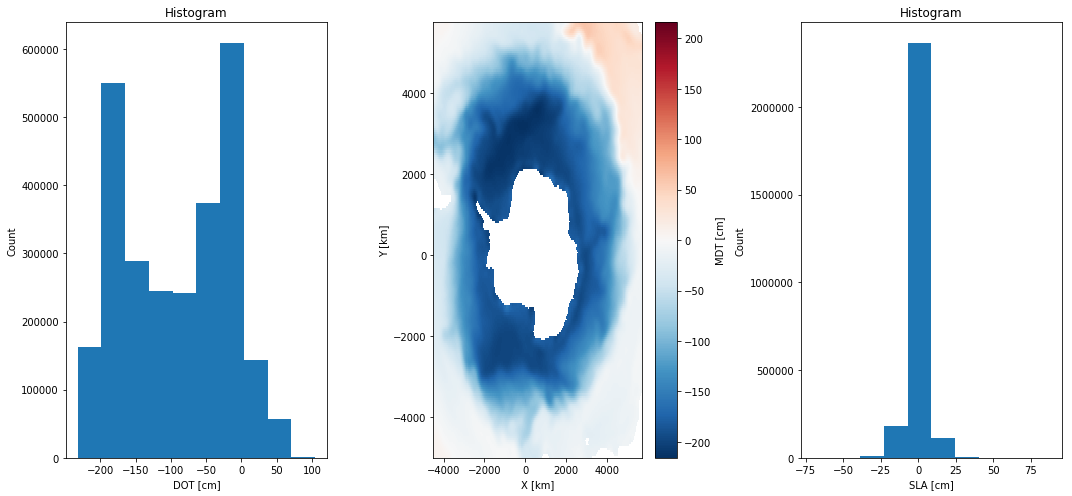

In [23]:
fig, ax = plt.subplots(ncols=3, figsize=(15,7))
ds.DOT.plot(ax=ax[0])
ds.MDT.plot(ax=ax[1])
ds.SLA.plot(ax=ax[2])
plt.tight_layout()

In [24]:
#Monthly mean SLA within -211cm, and at -205cm, mean DOT (MDT)
SLA_light_blue = (ds.where(ds.MDT<=-211)).groupby('date.month').mean(dim='date')
SLA_dark_blue = (ds.where(ds.MDT==-205, 999)).groupby('date.month').mean(dim='date')

(array([     0.,      0.,      0.,      0.,      0., 528900.,      0.,
             0.,      0.,      0.]),
 array([998.5, 998.6, 998.7, 998.8, 998.9, 999. , 999.1, 999.2, 999.3,
        999.4, 999.5], dtype=float32),
 <a list of 10 Patch objects>)

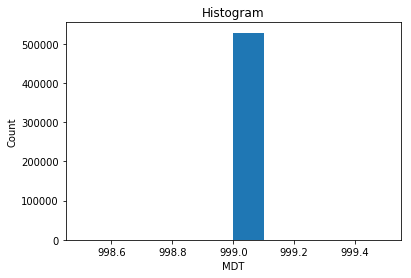

In [25]:
SLA_dark_blue.MDT.plot()

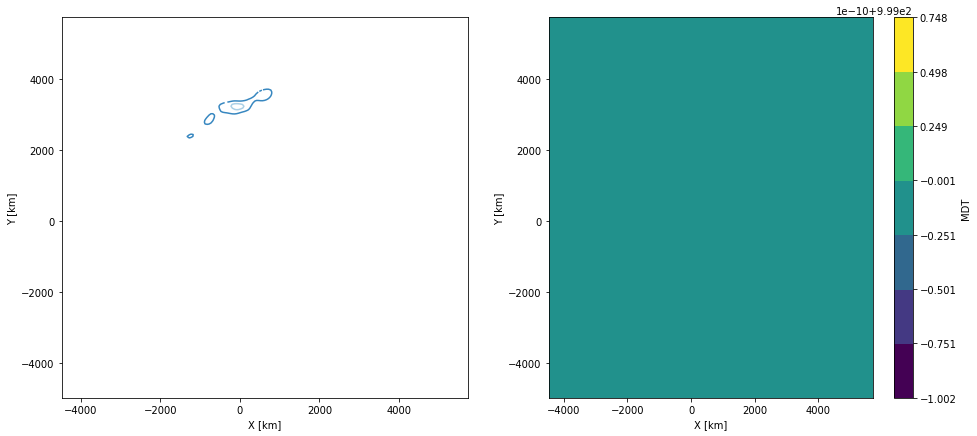

In [26]:
fig, ax = plt.subplots(ncols=2, figsize=(16,7))

SLA_light_blue.MDT.mean(dim='month').plot.contour(ax=ax[0], cmap='Blues', levels=3)
SLA_dark_blue.MDT.mean(dim='month').plot.contourf(ax=ax[1], levels=10)

In [27]:
SLA_light_blue

<xarray.Dataset>
Dimensions:    (X: 205, Y: 215, month: 12)
Coordinates:
  * X          (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y          (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
    Latitude   (Y, X) float32 -33.2011 -33.441322 -33.68056 -33.918777 ...
    Longitude  (Y, X) float32 -138.02869 -138.34859 -138.67169 -138.99803 ...
    Area       (Y, X) float32 1593.5522 1600.7418 1607.8981 1615.0198 ...
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    DOT        (month, Y, X) float32 nan nan nan nan nan nan nan nan nan nan ...
    SLA        (month, Y, X) float32 nan nan nan nan nan nan nan nan nan nan ...
    MDT        (month, Y, X) float32 nan nan nan nan nan nan nan nan nan nan ...

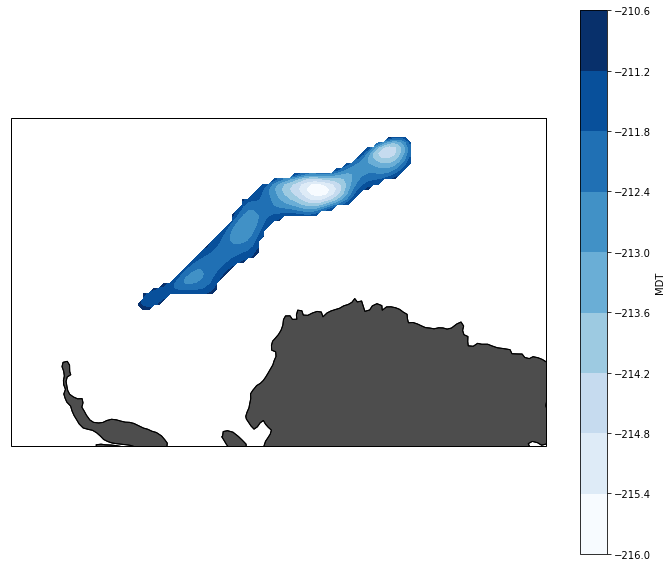

In [28]:
extent = [-50,33,-55,-79]
plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='0.3', edgecolor='k')
ax.set_extent(extent, crs=ccrs.PlateCarree())

depth_211 = (SLA_light_blue.MDT.mean(dim='month')).plot.contourf(x='Longitude', y='Latitude', 
                                                                 transform=ccrs.PlateCarree(), cmap='Blues',
                                                                levels=10)

#trying to get rest of contour lines to fill map
#ax.contour(SLA_light_blue.Longitude, SLA_light_blue.Latitude, ds.SLA.mean(dim='date'), transform=ccrs.PlateCarree())

extent = [-50,33,-55,-79]
plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='0.8', edgecolor='k')
ax.set_extent(extent, crs=ccrs.PlateCarree())

depth_205 = (SLA_dark_blue.MDT.mean(dim='month')).plot.contourf(x='Longitude', y='Latitude', levels=10,
                                                                 transform=ccrs.PlateCarree(), cmap='Blues')

In [29]:
gyre_depth = SLA_light_blue - SLA_dark_blue
gyre_depth

<xarray.Dataset>
Dimensions:    (X: 205, Y: 215, month: 12)
Coordinates:
  * X          (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y          (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
    Latitude   (Y, X) float32 -33.2011 -33.441322 -33.68056 -33.918777 ...
    Longitude  (Y, X) float32 -138.02869 -138.34859 -138.67169 -138.99803 ...
    Area       (Y, X) float32 1593.5522 1600.7418 1607.8981 1615.0198 ...
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    DOT        (month, Y, X) float32 nan nan nan nan nan nan nan nan nan nan ...
    SLA        (month, Y, X) float32 nan nan nan nan nan nan nan nan nan nan ...
    MDT        (month, Y, X) float32 nan nan nan nan nan nan nan nan nan nan ...

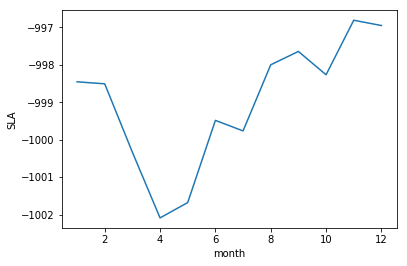

In [30]:
gyre_depth.SLA.mean(['Y', 'X']).plot()

### Calculating Wind Curl (not windstress curl)

In [31]:
u10 = 'http://kage.ldeo.columbia.edu:81/home/.datasets/.ERAInterim/.monthly/.Surface/.u10.nc/.u10/dods'
v10 = 'http://kage.ldeo.columbia.edu:81/home/.datasets/.ERAInterim/.monthly/.Surface/.v10.nc/.v10/dods'


ds_10_orig = xr.open_dataset(u10, decode_times=False).rename({'T':'time', 'X' : 'lon', 'Y' : 'lat'})
ds_10_orig['v10'] = xr.open_dataset(v10, decode_times=False).rename({'T':'time', 'X' : 'lon', 'Y' : 'lat'})['v10']

#fixing time
def fix_calendar(ds_10_orig, timevar='time'):
    if ds_10_orig[timevar].attrs['calendar'] == '360':
        ds_10_orig[timevar].attrs['calendar'] = '360_day'
    return ds_10_orig

ds_10_orig = fix_calendar(ds_10_orig)
ds_10_orig = xr.decode_cf(ds_10_orig)

#fixing lon
ds1 = ds_10_orig.roll(lon=-181).copy()
ds2 = ds1.drop('lon')
lon = ds1.lon.data
lon[lon>180.] -= 360.
ds2.coords['lon'] = ('lon', lon)
ds_10 = ds2
ds_10.lon

<xarray.DataArray 'lon' (lon: 360)>
array([-179., -178., -177., ...,  178.,  179.,  180.], dtype=float32)
Coordinates:
  * lon      (lon) float32 -179.0 -178.0 -177.0 -176.0 -175.0 -174.0 -173.0 ...

In [32]:
ds_10

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, time: 468)
Coordinates:
  * lat      (lat) float32 90.0 89.0 88.0 87.0 86.0 85.0 84.0 83.0 82.0 81.0 ...
  * time     (time) datetime64[ns] 1979-01-16 1979-02-16 1979-03-16 ...
  * lon      (lon) float32 -179.0 -178.0 -177.0 -176.0 -175.0 -174.0 -173.0 ...
Data variables:
    u10      (time, lat, lon) float32 0.9557618 0.96134233 0.96652424 ...
    v10      (time, lat, lon) float32 0.25627005 0.23519765 0.21493575 ...
Attributes:
    Conventions:  IRIDL

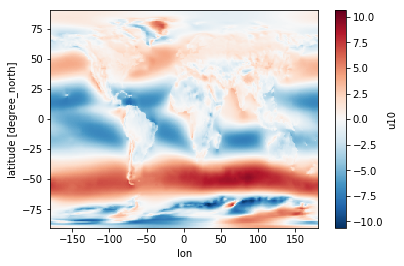

In [33]:
ds_10.u10.mean(dim='time').plot()

Giles et al. (2012)
$$
wind\ curl\ = \bigtriangledown \times (|\mathbf{u_{10}}|\mathbf{u_{10}})
$$

By component form, it breaks down to:
$$
= (\frac{\delta{(v|\mathbf{u}|)}}{\delta{x}} -\frac{\delta{(u|\mathbf{u}|)}}{\delta{y}})\mathbf{\hat{z}}\\
where\ |\mathbf{u}| = \sqrt{u^{2} + v^{2}}
$$

In [34]:
#calculating meters per latitudinal degree
earth_circumference = 2*np.pi*6.371e6
meters_per_degree = earth_circumference / 360
meters_per_degree

111194.92664455873

In [35]:
delta_lat = ds_10.lat.diff('lat')
delta_y = delta_lat * meters_per_degree
#delta_y

In [36]:
delta_lon = ds_10.lat.diff('lon')
delta_x = delta_lon * meters_per_degree * np.cos(np.deg2rad(ds_10.lon))
#delta_x

In [37]:
#absolute value of the wind vector
u_abs = np.sqrt((ds_10.u10**2) + (ds_10.v10**2))
#u_abs

In [38]:
vu = ds_10.v10 * u_abs 
uu = ds_10.u10 * u_abs

In [39]:
delta_vu = vu.diff(dim='lon')
#delta_vu

In [40]:
delta_uu = uu.diff(dim='lat')
#delta_uu

Let's remind ourselves the equation:
$$
wind\ curl\ = (\frac{\delta{(v|\mathbf{u}|)}}{\delta{x}} -\frac{\delta{(u|\mathbf{u}|)}}{\delta{y}})\mathbf{\hat{z}}
$$

In [41]:
#not sure how to take Z... create an array of (0,0,1) and multiply by everything?
wind_curl_1 = (delta_vu / delta_x) - (delta_uu / delta_y)
wind_curl_1

<xarray.DataArray (time: 468, lat: 180, lon: 359)>
array([[[-5.378460e-06, -5.390296e-06, ..., -5.276909e-06, -5.357329e-06],
        [-4.199518e-06, -4.168400e-06, ..., -4.274279e-06, -4.275285e-06],
        ...,
        [ 1.236575e-04,  1.241580e-04, ...,  1.211630e-04,  1.226772e-04],
        [ 3.039786e-05,  3.027522e-05, ...,  3.061002e-05,  3.066123e-05]],

       [[ 2.246428e-06,  2.309349e-06, ...,  2.181035e-06,  2.134100e-06],
        [ 6.778160e-06,  6.855990e-06, ...,  6.483862e-06,  6.656809e-06],
        ...,
        [ 1.022151e-04,  1.020365e-04, ...,  1.022056e-04,  1.025233e-04],
        [ 3.441828e-05,  3.406272e-05, ...,  3.542245e-05,  3.515196e-05]],

       ...,

       [[-4.224948e-06, -4.201720e-06, ..., -4.224362e-06, -4.269901e-06],
        [-3.024100e-06, -3.094023e-06, ..., -2.831278e-06, -2.902915e-06],
        ...,
        [ 3.543767e-04,  3.584306e-04, ...,  3.392548e-04,  3.465662e-04],
        [ 9.623730e-05,  9.753448e-05, ...,  9.309220e-05,  9.384304

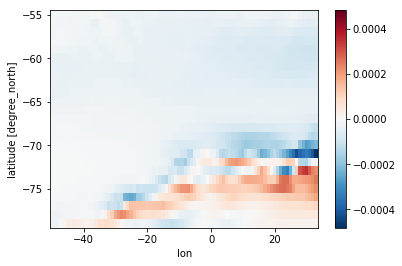

In [42]:
weddell_wind_curl_1 = wind_curl_1.sel(lon=slice(-50,33), lat=slice(-55, -79), time=slice('2011','2016'))
weddell_wind_curl_1.mean('time').plot()

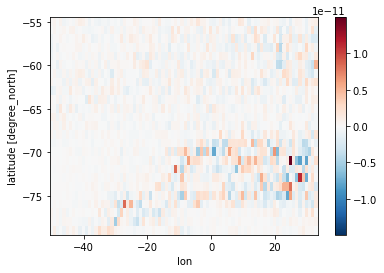

In [43]:
#taking out monthly mean to take out seasonal cycle
weddell_season_out = weddell_wind_curl_1.groupby('time.month') - (weddell_wind_curl_1.groupby('time.month')
                                                                                 .mean(dim='time'))
weddell_season_out.mean(dim='time').plot()

Text(0.5,1,'Figure 6b)')

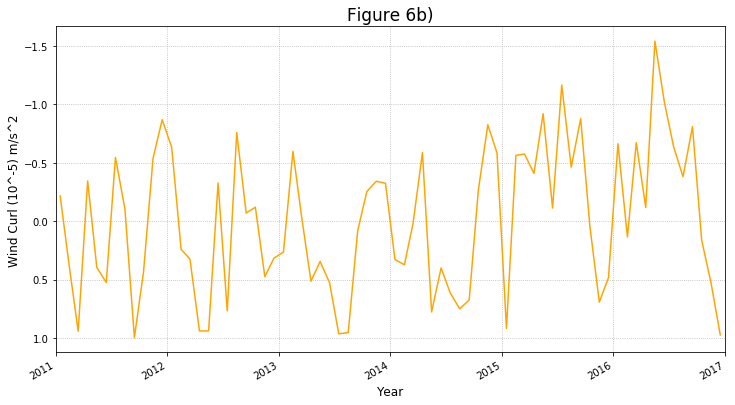

In [44]:
(weddell_season_out*1e5).mean(['lat','lon']).plot(figsize=(12,6), c='orange')
plt.grid(linestyle='dotted')
plt.ylabel('Wind Curl (10^-5) m/s^2', fontsize=12)
plt.gca().invert_yaxis()
plt.xlim(xmin='2011', xmax='2017')
plt.xlabel('Year', fontsize=12, )
plt.title('Figure 6b)', fontsize=17, fontweight=20)

![figure](weddell_wind_curl.png)

**Figure 6b).** The nonseasonal wind curl(10e-5 m/s2) for Weddell Gyre. 
>This figure is meant to have nonseasonal Gyre depth superimposed so that we can see role of wind forcing on gyre depth variability. The paper uses the wind curl instead of the windstress curl  as surface atmospheric forcing metric in order to "isolate the influence of wind variability in a region where the surface drag coefficient is heavily modified by the presence of sea ice in ways that may not be well-represented in reanalyses".

## Fig 7a)
Average over seasons: summer-(JFM), **autumn-(AMJ)**, winter-(JAS), **spring-(OND)**

In [45]:
ds.SLA
# there are more than one X,Y pts for each date
# there are 10 less X values than Y

<xarray.DataArray 'SLA' (date: 72, Y: 215, X: 205)>
array([[[      nan, -3.29174 , ...,       nan,       nan],
        [-3.469368, -2.889778, ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan, -3.646484, ...,       nan,       nan],
        ...,
        [      nan,  4.681908, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [-2.658859, -2.367737, ...,       nan,       nan],
        ...,
        [      nan, -1.910904, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,  0.415253, ...,       nan,       nan],
        ...,
        [      nan, -6.129494, ...,       nan,     

In [46]:
ds.SLA.date

<xarray.DataArray 'date' (date: 72)>
array(['2011-01-01T00:00:00.000000000', '2011-02-01T00:00:00.000000000',
       '2011-03-01T00:00:00.000000000', '2011-04-01T00:00:00.000000000',
       '2011-05-01T00:00:00.000000000', '2011-06-01T00:00:00.000000000',
       '2011-07-01T00:00:00.000000000', '2011-08-01T00:00:00.000000000',
       '2011-09-01T00:00:00.000000000', '2011-10-01T00:00:00.000000000',
       '2011-11-01T00:00:00.000000000', '2011-12-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2012-02-01T00:00:00.000000000',
       '2012-03-01T00:00:00.000000000', '2012-04-01T00:00:00.000000000',
       '2012-05-01T00:00:00.000000000', '2012-06-01T00:00:00.000000000',
       '2012-07-01T00:00:00.000000000', '2012-08-01T00:00:00.000000000',
       '2012-09-01T00:00:00.000000000', '2012-10-01T00:00:00.000000000',
       '2012-11-01T00:00:00.000000000', '2012-12-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2013-02-01T00:00:00.000000000',
       '2013-0

### Calculating Gyre Depth

In [47]:
mean_DOT = ds.DOT.mean()
mean_DOT

<xarray.DataArray 'DOT' ()>
array(-91.366188)

In [48]:
gyre_depth = SLA_light_blue - SLA_dark_blue

In [49]:
#Do we calculate f with ds.Latitude or ds.Y? I think ds.Latitude
g = 9.81 #m/s-2
omega = 7.2921159e-5 #rad/sec
f = 2*omega*np.sin(ds.Latitude) #s-1

In [50]:
del_x = 
del_y = 
lap_H = [del_delx, del_dely, 0]

SyntaxError: invalid syntax (<ipython-input-50-a9e528eca886>, line 1)

## Figure 7b)

In [ ]:
aa_wind_curl = wind_curl.sel(lon=slice(-179,180), lat=slice(-40, -90), time=slice('2011','2016'))
aa_wind_curl.mean('time').plot()

In [ ]:
extent = [-180,180,-55,-90]
plt.figure(figsize=(12,10))
central_lon = np.mean(extent[:2])

ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='0.8', edgecolor='k')
ax.set_extent(extent, crs=ccrs.PlateCarree())

(aa_wind_curl*1e4).mean('time').plot(transform=ccrs.PlateCarree(central_longitude=central_lon), cmap='RdBu_r');
plt.title('Antarctic Wind Curl')

## Figure 10 a)

In [ ]:
ds.SLA

In [ ]:
nino = ds.SLA.sel(date=slice('201506','201604')).mean(dim='date')
nino.plot()

In [ ]:
#having trouble plotting contours once again

extent = [-180,180,-55,-90]
plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='0.8', edgecolor='k')
ax.set_extent(extent, crs=ccrs.PlateCarree())

CS=nino.plot.pcolormesh(x='Longitude', y='Latitude', transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=-10, vmax=10)
#nino.plot.contour(x='Longitude', y='Latitude', levels=20)
#plt.colorbar(CS)
#plt.show()
plt.title('Figure 10a)\nEl Nino SLA (cm)', fontsize=18)

In [ ]:
#having trouble plotting contours once again

extent = [-180,180,-55,-90]
plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='0.8', edgecolor='k')
ax.set_extent(extent, crs=ccrs.PlateCarree())

ax.pcolormesh(nino.Longitude,nino.Latitude, nino, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=-10, vmax=10,)
#nino.plot.contour(x='Longitude', y='Latitude', levels=20)
#plt.colorbar()
#plt.show()
plt.title('Figure 10a)\nEl Nino SLA (cm)', fontsize=18)

> **Figure 10a).** June 2015 to April 2016 time-mean sea level anomaly (cm).

Geostrophic Current:
$$
\mathbf{u_g} = \frac{f}{g}( \mathbf{\hat{k}} \times \nabla_{H}H_{DOT})
$$

where the dynamic ocean topography (DOT) 
is the SSH relative to the geoid:

$$
H_{DOT} = H_{SSH} - H_{geoid} = A-(R+\sum{H_{CORR}}) - H_{geoid}
$$

In [ ]:
! wget http://kage.ldeo.columbia.edu/data/ERA-1deg/taux-ERA.nc
! wget http://kage.ldeo.columbia.edu/data/ERA-1deg/tauy-ERA.nc